In [62]:
!pip install pmdarima
!pip uninstall pandas -y
!pip install pandas==1.1.3
!pip install statsmodels==0.11.0
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0


Found existing installation: pandas 1.1.3
Uninstalling pandas-1.1.3:
  Successfully uninstalled pandas-1.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.1.3-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.11.0-cp37-cp37m-manylinux1_x86_64.whl (8.7 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.1 requires statsmodels>=0.13.2, but you have statsmodels 0.11.0 which is incompatible.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.11.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import os
import csv
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime as dt
import pmdarima as pm
import plotly.tools as tls
import plotly.offline as py
import statsmodels.api as sm 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
#----------------
from math import sqrt
from scipy import stats
from keras.models import load_model
from scipy.sparse import hstack, csr_matrix
from matplotlib.colors import ListedColormap
#----------------
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
#----------------
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#----------------
# Scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#----------------
# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#----------------
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#----------------
#modelimport numpy as np
from sklearn.svm import SVR
from subprocess import check_output
#----------------
#---- LSTM Models
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
#---- ARIMA Models
from statsmodels.tsa.arima.model import ARIMA    #new
#from statsmodels.tsa.arima_model import ARIMA   #old
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#----------------
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
py.init_notebook_mode(connected=True)
%matplotlib inline
#----------------
# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
BOLD = '\033[1m'
END = '\033[0m'

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Read csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Capstone_SDA_2022/7010.SR.csv')


In [66]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-07,17.680000,17.760000,17.639999,17.760000,9.840245,1808842.0
1,2010-03-08,17.680000,17.879999,17.680000,17.840000,9.884571,2270710.0
2,2010-03-09,17.879999,18.000000,17.840000,17.920000,9.928896,2331557.0
3,2010-03-10,17.959999,18.040001,17.840000,17.920000,9.928896,3115827.0
4,2010-03-11,17.920000,17.920000,17.840000,17.879999,9.906732,1138180.0
...,...,...,...,...,...,...,...
3173,2022-08-28,41.759998,42.639999,41.439999,42.320000,42.320000,6546492.0
3174,2022-08-29,42.480000,42.720001,41.759998,42.000000,42.000000,8454035.0
3175,2022-08-30,42.160000,42.320000,41.599998,41.599998,41.599998,28737437.0
3176,2022-08-31,41.950001,42.450001,41.500000,41.799999,41.799999,11933864.0


In [67]:
# replace white spaces with _ in columns names and lower all character
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [68]:
# replace white spaces with _ in columns value and lower all character
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [69]:
df.isnull().sum()

date           0
open         122
high         122
low          122
close        122
adj_close    122
volume       122
dtype: int64

In [70]:
df = df.fillna(method='ffill')

In [71]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [72]:
df.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume       float64
dtype: object

In [73]:
df['date'] = pd.to_datetime(df.date)

In [74]:
df.set_index('date', inplace=True, drop=True)

In [75]:
df

,open,high,low,close,adj_close,volume
date,,,,,,
2010-03-07,17.680000,17.760000,17.639999,17.760000,9.840245,1808842.0
2010-03-08,17.680000,17.879999,17.680000,17.840000,9.884571,2270710.0
2010-03-09,17.879999,18.000000,17.840000,17.920000,9.928896,2331557.0
2010-03-10,17.959999,18.040001,17.840000,17.920000,9.928896,3115827.0
2010-03-11,17.920000,17.920000,17.840000,17.879999,9.906732,1138180.0
...,...,...,...,...,...,...
2022-08-28,41.759998,42.639999,41.439999,42.320000,42.320000,6546492.0
2022-08-29,42.480000,42.720001,41.759998,42.000000,42.000000,8454035.0
2022-08-30,42.160000,42.320000,41.599998,41.599998,41.599998,28737437.0


In [76]:
df['open'] = df['open'] * 2.5 
df['high'] = df['high'] * 2.5 
df['low'] = df['low'] * 2.5 
df['close'] = df['close'] * 2.5 
df

,open,high,low,close,adj_close,volume
date,,,,,,
2010-03-07,44.200000,44.400000,44.099998,44.400000,9.840245,1808842.0
2010-03-08,44.200000,44.699997,44.200000,44.600000,9.884571,2270710.0
2010-03-09,44.699997,45.000000,44.600000,44.800000,9.928896,2331557.0
2010-03-10,44.899997,45.100003,44.600000,44.800000,9.928896,3115827.0
2010-03-11,44.800000,44.800000,44.600000,44.699997,9.906732,1138180.0
...,...,...,...,...,...,...
2022-08-28,104.399995,106.599997,103.599998,105.800000,42.320000,6546492.0
2022-08-29,106.200000,106.800003,104.399995,105.000000,42.000000,8454035.0
2022-08-30,105.400000,105.800000,103.999995,103.999995,41.599998,28737437.0


## *Preprocessing*

In [77]:
#copy of dataset
df_lstm = df.copy()
df_lstm

,open,high,low,close,adj_close,volume
date,,,,,,
2010-03-07,44.200000,44.400000,44.099998,44.400000,9.840245,1808842.0
2010-03-08,44.200000,44.699997,44.200000,44.600000,9.884571,2270710.0
2010-03-09,44.699997,45.000000,44.600000,44.800000,9.928896,2331557.0
2010-03-10,44.899997,45.100003,44.600000,44.800000,9.928896,3115827.0
2010-03-11,44.800000,44.800000,44.600000,44.699997,9.906732,1138180.0
...,...,...,...,...,...,...
2022-08-28,104.399995,106.599997,103.599998,105.800000,42.320000,6546492.0
2022-08-29,106.200000,106.800003,104.399995,105.000000,42.000000,8454035.0
2022-08-30,105.400000,105.800000,103.999995,103.999995,41.599998,28737437.0


In [78]:
# checking the type of the date
df_lstm.dtypes

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume       float64
dtype: object

In [79]:
def split_train_test(data):
    data_train=pd.DataFrame(data['close'][0:int(len(data)*0.80)])
    data_test=pd.DataFrame(data['close'][int(len(data)*0.80):int(len(data))])
    print(data_train.shape, data_test.shape)
    return data_train , data_test

In [80]:
data_train3 , data_test3 = split_train_test(df_lstm)

(2542, 1) (636, 1)


In [81]:
data_test3

,close
date,
2020-02-12,86.000005
2020-02-13,85.600005
2020-02-16,85.600005
2020-02-17,86.800003
2020-02-18,86.999998
...,...
2022-08-28,105.800000
2022-08-29,105.000000
2022-08-30,103.999995


In [82]:
#Function To spilit Test dataset to x and y

def split_test(data_train,data_test):
    MMS = MinMaxScaler(feature_range=(0,1))
    #get the last 180 day to pridict 
    last_180_days=data_train.tail(180)

    #test data
    final_df=last_180_days.append(data_test,ignore_index=True)

    final_df_MMS = MMS.fit_transform(final_df)
    final_df_MMS
    x_test=[]
    y_test=[]

    #split feature and target
    for i in range(180,final_df_MMS.shape[0]):
        x_test.append(final_df_MMS[i-180:i])
        y_test.append(final_df_MMS[i,0])

    x_test,y_test=np.array(x_test),np.array(y_test)
    print(x_test.shape)
    print(y_test.shape)

    return x_test , y_test

In [83]:
x_test3 , y_test3 = split_test(data_train3,data_test3)

(636, 180, 1)
(636,)


In [84]:
# y_test3

In [85]:
#load the model 
lstm=load_model("/content/drive/MyDrive/Colab Notebooks/Final_Capstone_SDA_2022/KSA_STC_Stocks_LSTM_model.h5")

In [86]:
y_predicted3=lstm.predict(x_test3)
# y_predicted3

In [87]:
mea_lstm = mean_absolute_error(y_true=y_test3, y_pred=y_predicted3)
mea_lstm

0.04328049426949817

## *Evaluating*

In [88]:
# Function for evaluating regression models

def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,4)}')
    print(f'Mean Absolute Error: {round(mae,4)}\n\n')

In [89]:
# print result

model_name3 = ['LSTM']
model_pred3 = [y_predicted3]

for x in range(len(model_pred3)):
    
    reg_cost(model_name3[x],y_test3, model_pred3[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0033
Mean Absolute Error: 0.0433




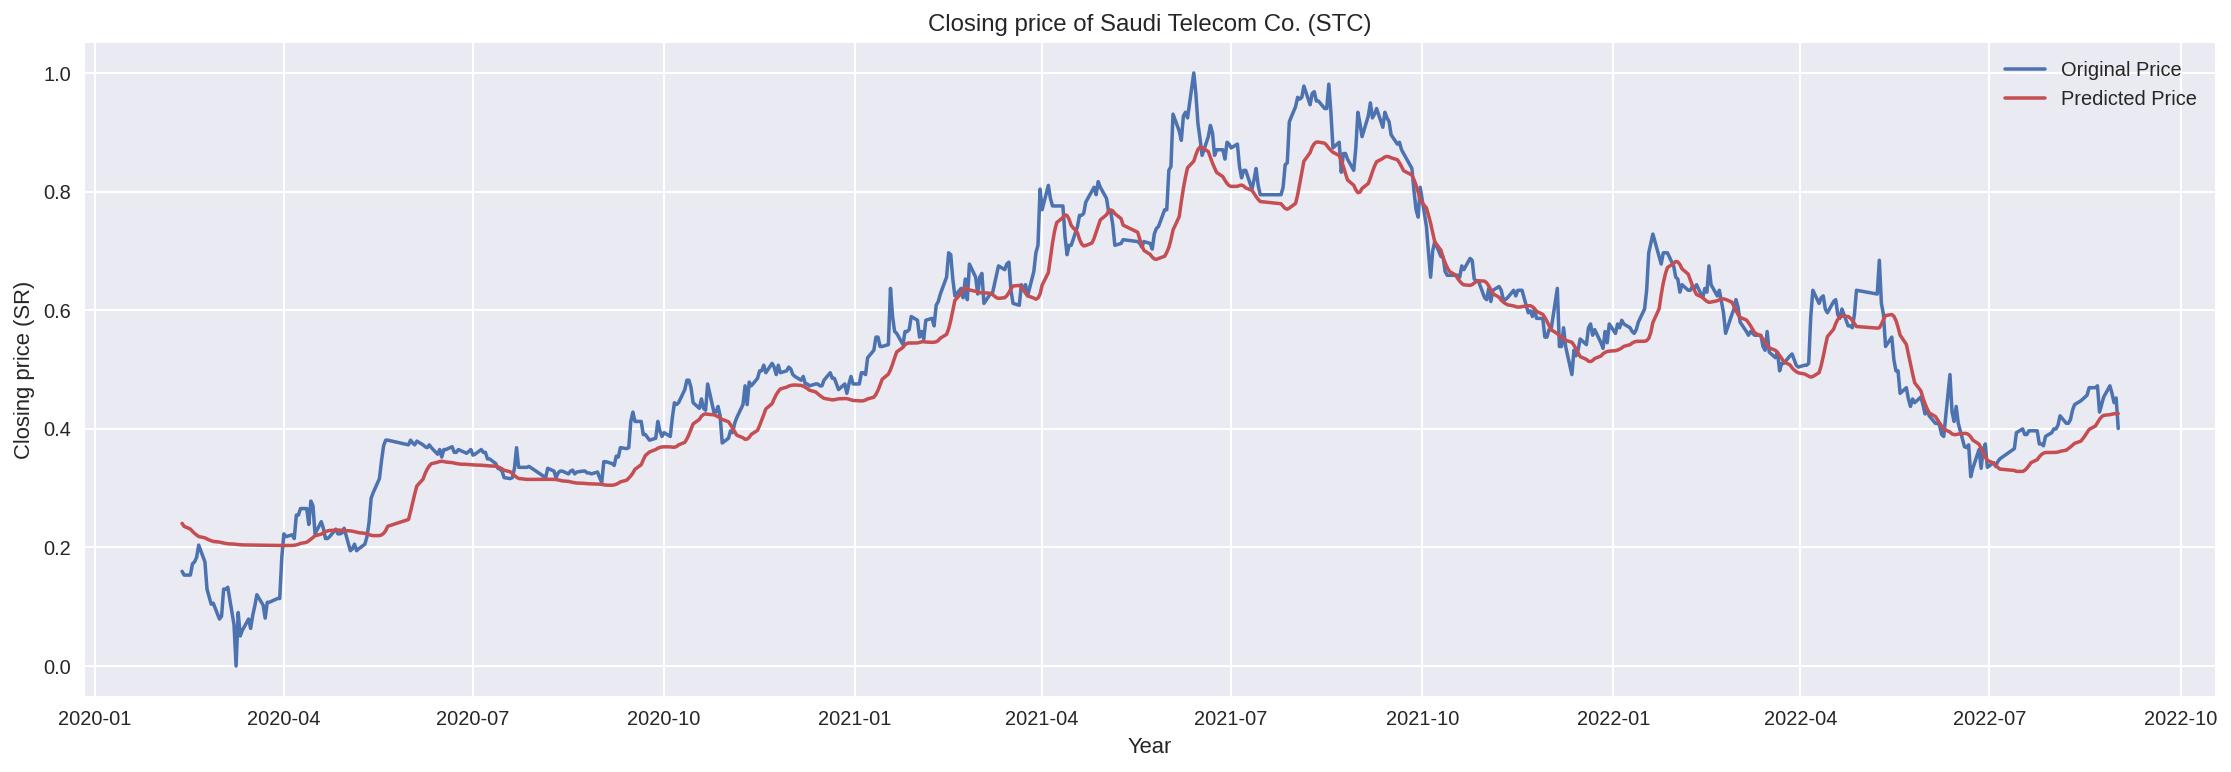

In [90]:
#plot of prediction price for STC

plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test3.index,y_test3,'b',label='Original Price')
plt.plot(data_test3.index,y_predicted3,'r',label='Predicted Price')
plt.title('Closing price of Saudi Telecom Co. (STC)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [91]:
#results

testdata3= pd.DataFrame()
testdata3['date']=data_test3.index
testdata3['Actual_close'] = y_test3
testdata3['Predict_close'] = y_predicted3

testdata3['p>0.1a']=(testdata3['Actual_close']-0.15*testdata3['Actual_close'])

testdata3['p<0.1a']=testdata3['Actual_close']+0.15*testdata3['Actual_close']


testdata3['results_LSTM'] =(testdata3['Predict_close']>=testdata3['Actual_close']-0.15*testdata3['Actual_close'])&(testdata3['Predict_close']<=testdata3['Actual_close']+0.15*testdata3['Actual_close'])

testdata3.tail()

,date,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
631,2022-08-28,0.472354,0.423762,0.401501,0.543207,True
632,2022-08-29,0.459716,0.424547,0.390758,0.528673,True
633,2022-08-30,0.443918,0.425256,0.377330,0.510505,True
634,2022-08-31,0.451817,0.425612,0.384044,0.519589,True
635,2022-09-01,0.400474,0.425606,0.340403,0.460545,True


In [92]:
(((testdata3['results_LSTM'].value_counts())/len(testdata3['results_LSTM']))*100).round(2).astype(str)+'%'

True     83.18%
False    16.82%
Name: results_LSTM, dtype: object

In [93]:
# Read csv file
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Capstone_SDA_2022/1120.SR.csv')

In [94]:
# replace white spaces with _ in columns names and lower all character
df_2.columns = df_2.columns.str.lower().str.replace(' ', '_')
string_columns = list(df_2.dtypes[df_2.dtypes == 'object'].index)

In [95]:
# replace white spaces with _ in columns value and lower all character
for col in string_columns:
    df_2[col] = df_2[col].str.lower().str.replace(' ', '_')

In [96]:
df_2.isnull().sum()

date          0
open         87
high         87
low          87
close        87
adj_close    87
volume       87
dtype: int64

In [97]:
df_2 = df_2.fillna(method='ffill')

In [98]:
df_2.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [99]:
df_2

,date,open,high,low,close,adj_close,volume
0,2010-03-08,28.875879,29.063385,28.782125,28.782125,17.935528,2203255.0
1,2010-03-09,28.875879,29.250891,28.875879,29.063385,18.110792,3617428.0
2,2010-03-10,29.063385,29.157139,28.875879,28.969631,18.052374,2465236.0
3,2010-03-11,28.875879,29.157139,28.875879,29.063385,18.110792,2781835.0
4,2010-03-14,29.157139,29.250891,29.063385,29.157139,18.169218,2135390.0
...,...,...,...,...,...,...,...
3176,2022-09-01,90.199997,90.400002,88.000000,88.900002,88.900002,4771036.0
3177,2022-09-04,88.800003,88.800003,88.000000,88.500000,88.500000,2860941.0
3178,2022-09-05,88.000000,88.900002,87.699997,87.800003,87.800003,4622841.0
3179,2022-09-06,87.800003,88.300003,86.199997,86.400002,86.400002,5096850.0


In [100]:
df_2['date'] = pd.to_datetime(df_2.date)


In [101]:
df_2.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume              float64
dtype: object

In [102]:
df_2.set_index('date', inplace=True, drop=True)

In [103]:
df_2

,open,high,low,close,adj_close,volume
date,,,,,,
2010-03-08,28.875879,29.063385,28.782125,28.782125,17.935528,2203255.0
2010-03-09,28.875879,29.250891,28.875879,29.063385,18.110792,3617428.0
2010-03-10,29.063385,29.157139,28.875879,28.969631,18.052374,2465236.0
2010-03-11,28.875879,29.157139,28.875879,29.063385,18.110792,2781835.0
2010-03-14,29.157139,29.250891,29.063385,29.157139,18.169218,2135390.0
...,...,...,...,...,...,...
2022-09-01,90.199997,90.400002,88.000000,88.900002,88.900002,4771036.0
2022-09-04,88.800003,88.800003,88.000000,88.500000,88.500000,2860941.0
2022-09-05,88.000000,88.900002,87.699997,87.800003,87.800003,4622841.0


In [104]:
df_lstm_2 = df_2.copy()
df_lstm_2

,open,high,low,close,adj_close,volume
date,,,,,,
2010-03-08,28.875879,29.063385,28.782125,28.782125,17.935528,2203255.0
2010-03-09,28.875879,29.250891,28.875879,29.063385,18.110792,3617428.0
2010-03-10,29.063385,29.157139,28.875879,28.969631,18.052374,2465236.0
2010-03-11,28.875879,29.157139,28.875879,29.063385,18.110792,2781835.0
2010-03-14,29.157139,29.250891,29.063385,29.157139,18.169218,2135390.0
...,...,...,...,...,...,...
2022-09-01,90.199997,90.400002,88.000000,88.900002,88.900002,4771036.0
2022-09-04,88.800003,88.800003,88.000000,88.500000,88.500000,2860941.0
2022-09-05,88.000000,88.900002,87.699997,87.800003,87.800003,4622841.0


In [105]:
df_lstm_2.dtypes

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume       float64
dtype: object

In [106]:
data_train4 , data_test4 = split_train_test(df_lstm_2)

(2544, 1) (637, 1)


In [107]:
data_test4

,close
date,
2020-02-17,40.000000
2020-02-18,40.000000
2020-02-19,40.562500
2020-02-20,40.937500
2020-02-23,40.812500
...,...
2022-09-01,88.900002
2022-09-04,88.500000
2022-09-05,87.800003


In [108]:
x_test4 , y_test4 = split_test(data_train4,data_test4)

(637, 180, 1)
(637,)


In [109]:
y_predicted4 =lstm.predict(x_test4)

In [110]:
mea_lstm_2 = mean_absolute_error(y_true=y_test4, y_pred=y_predicted4)
mea_lstm_2

0.06672138102234594

In [111]:
# print result

model_name4 = ['LSTM']
model_pred4 = [y_predicted4]

for x in range(len(model_pred4)):
    
    reg_cost(model_name4[x],y_test4, model_pred4[x] )

Cost functions for the LSTM regression is:
Mean Square Error: 0.0073
Mean Absolute Error: 0.0667




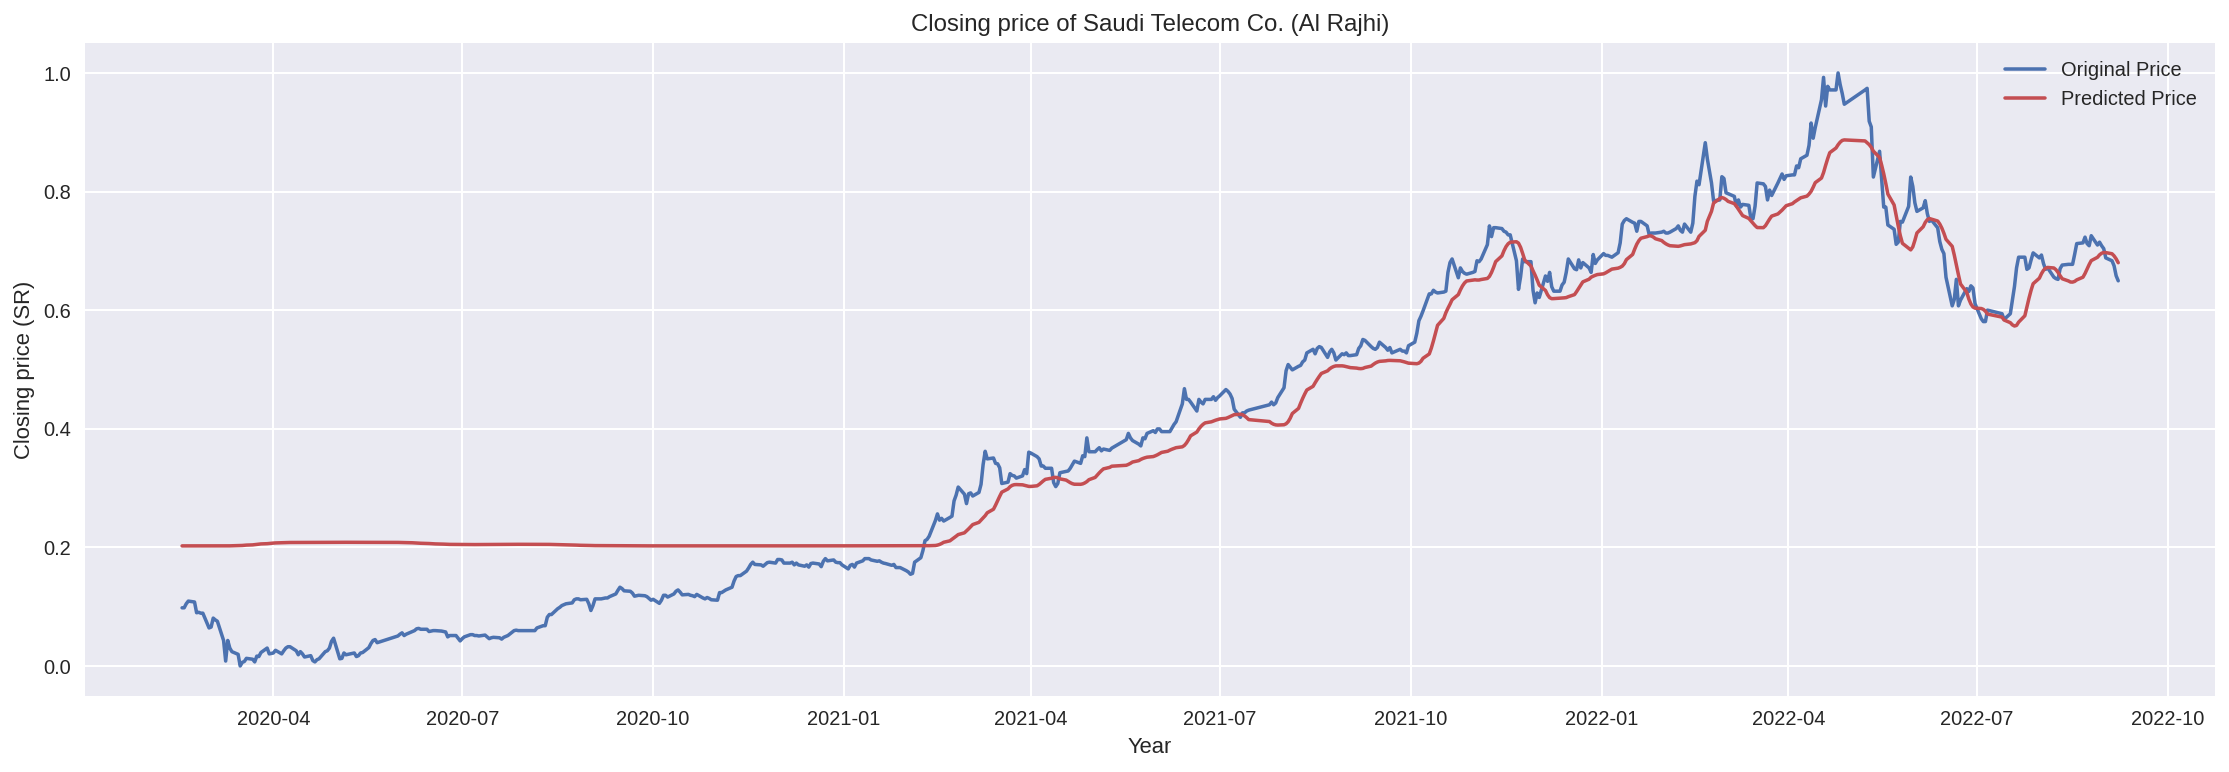

In [112]:
#plot of prediction price for STC

plt.style.use("seaborn")
plt.figure(figsize=(17, 6))
plt.plot(data_test4.index,y_test4,'b',label='Original Price')
plt.plot(data_test4.index,y_predicted4,'r',label='Predicted Price')
plt.title('Closing price of Saudi Telecom Co. (Al Rajhi)')
plt.ylabel('Closing price (SR)')
plt.xlabel('Year')
plt.legend()
plt.show()

In [113]:
#results

testdata4= pd.DataFrame()
testdata4['date']=data_test4.index
testdata4['Actual_close'] = y_test4
testdata4['Predict_close'] = y_predicted4

testdata4['p>0.1a']=(testdata4['Actual_close']-0.15*testdata4['Actual_close'])

testdata4['p<0.1a']=testdata4['Actual_close']+0.15*testdata4['Actual_close']


testdata4['results_LSTM'] =(testdata4['Predict_close']>=testdata4['Actual_close']-0.15*testdata4['Actual_close'])&(testdata4['Predict_close']<=testdata4['Actual_close']+0.15*testdata4['Actual_close'])

testdata4.tail()

,date,Actual_close,Predict_close,p>0.1a,p<0.1a,results_LSTM
632,2022-09-01,0.688084,0.697020,0.584872,0.791297,True
633,2022-09-04,0.683258,0.695095,0.580769,0.785747,True
634,2022-09-05,0.674811,0.691489,0.573590,0.776033,True
635,2022-09-06,0.657919,0.686460,0.559231,0.756606,True
636,2022-09-07,0.649472,0.679973,0.552051,0.746893,True


In [114]:
(((testdata4['results_LSTM'].value_counts())/len(testdata4['results_LSTM']))*100).round(2).astype(str)+'%'

True     58.24%
False    41.76%
Name: results_LSTM, dtype: object